In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## Chargement et Prétraitement des Données FD001

In [2]:
# Chemin du fichier contenant les données du moteur FD001
data_path = r"..\data\train_FD001.txt"  

# Charger les données à partir du fichier texte
data_FD001 = pd.read_csv(data_path, sep=" ", header=None)

data_FD001

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN




Les données du dataset **FD001** proviennent de simulations réalisées sur des moteurs à réaction (turbofan). Chaque ligne représente un instant donné dans la vie d'un moteur simulé, et les mesures ont été collectées à chaque cycle pendant la simulation.



#### Suppression des colonnes inutiles

In [3]:

# les colonnes 26 et 27 sont vides 
data_FD001 = data_FD001.drop([26, 27], axis='columns')

#### Définir les noms des colonnes pour le dataset


Les cinq premières colonnes représentent les informations principales et les paramètres d'opération :

 - 'engine' : Identifiant unique du moteur.
 - 'time' : Cycle opérationnel (nombre de cycles depuis le début de la simulation).
 - 'op_setting_1', 'op_setting_2', 'op_setting_3' : Paramètres d'opération simulés.

Les colonnes restantes représentent les mesures des capteurs :

 - 'sm_1' à 'sm_21' : Mesures des capteurs (sensor measurements).

In [4]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2', 
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

# Attribuer les noms de colonnes au DataFrame
data_FD001.columns = column_names


#### Créer une liste contenant les descriptions des capteurs

In [5]:
Sensor_dictionary = {}

# Chaque élément correspond à une mesure spécifique liée au fonctionnement du moteur
dict_list = [
    "(Fan inlet temperature) (◦R)",                     # Température à l'entrée du ventilateur
    "(LPC outlet temperature) (◦R)",                    # Température à la sortie du compresseur basse pression
    "(HPC outlet temperature) (◦R)",                    # Température à la sortie du compresseur haute pression
    "(LPT outlet temperature) (◦R)",                    # Température à la sortie de la turbine basse pression
    "(Fan inlet Pressure) (psia)",                      # Pression à l'entrée du ventilateur
    "(bypass-duct pressure) (psia)",                    # Pression dans le conduit de contournement
    "(HPC outlet pressure) (psia)",                     # Pression à la sortie du compresseur haute pression
    "(Physical fan speed) (rpm)",                       # Vitesse physique du ventilateur
    "(Physical core speed) (rpm)",                      # Vitesse physique du cœur du moteur
    "(Engine pressure ratio(P50/P2)",                   # Rapport de pression du moteur
    "(HPC outlet Static pressure) (psia)",              # Pression statique à la sortie du compresseur haute pression
    "(Ratio of fuel flow to Ps30) (pps/psia)",          # Rapport du débit de carburant à Ps30
    "(Corrected fan speed) (rpm)",                      # Vitesse corrigée du ventilateur
    "(Corrected core speed) (rpm)",                     # Vitesse corrigée du cœur
    "(Bypass Ratio)",                                   # Rapport de contournement
    "(Burner fuel-air ratio)",                          # Rapport carburant-air dans la chambre de combustion
    "(Bleed Enthalpy)",                                 # Enthalpie du sang prélevé
    "(Required fan speed)",                             # Vitesse du ventilateur requise
    "(Required fan conversion speed)",                 # Vitesse de conversion requise pour le ventilateur
    "(High-pressure turbines Cool air flow)",          # Flux d'air froid dans la turbine haute pression
    "(Low-pressure turbines Cool air flow)"            # Flux d'air froid dans la turbine basse pression
]


i = 1
for x in dict_list:
    Sensor_dictionary[f'sm_{i}'] = x  # Associer la clé 'sm_i' à la description du capteur
    i += 1  


Sensor_dictionary


{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio)',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

In [6]:
data_FD001

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


#### Vérification de la qualité des données : Nettoyage des Données


In [7]:

df_info = pd.concat(
    [data_FD001.isna().sum(),  # Vérifie les valeurs manquantes dans chaque colonne
     data_FD001.nunique(),     # Compte le nombre de valeurs uniques dans chaque colonne
     data_FD001.dtypes],       # Liste le type de données de chaque colonne
    axis=1  # Combine les résultats dans un tableau récapitulatif
)

df_info.columns = ['missing value', 'number unique value', 'dtype']

# Afficher les résultats pour vérifier la qualité des données
df_info


,missing value,number unique value,dtype
engine,0,100,int64
time,0,362,int64
op_setting_1,0,158,float64
op_setting_2,0,13,float64
op_setting_3,0,1,float64
sm_1,0,1,float64
sm_2,0,310,float64
sm_3,0,3012,float64
sm_4,0,4051,float64
sm_5,0,1,float64



#### Résultats :

- **Colonnes contenant une valeur unique (constantes)** :
  - op_setting_3
  - sm_1
  - sm_5
  - sm_10
  - sm_16
  - sm_18
  - sm_19
  
Ces colonnes sont constantes, ce qui signifie qu'elles n'apportent aucune information discriminante pour l'analyse. Elles peuvent être exclues des étapes d'entraînement du modèle.

- **Colonne avec seulement deux valeurs** :
  - sm_6
  
Cette colonne contient deux valeurs distinctes et peut potentiellement apporter une information utile pour l'analyse.


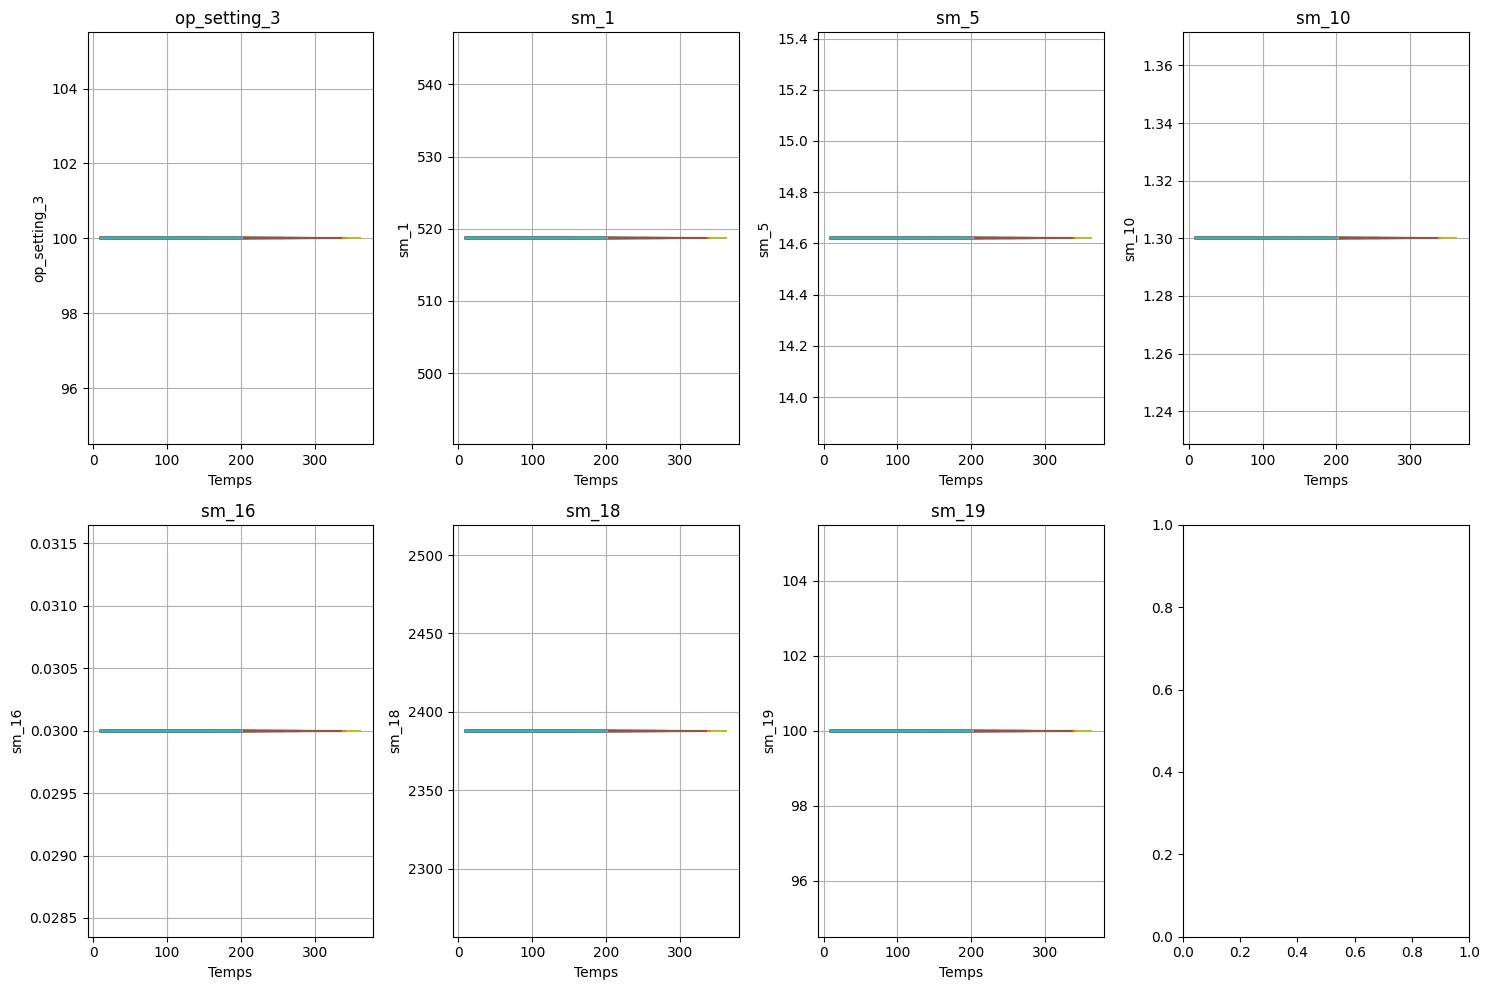

In [8]:
# Tracer les graphiques pour chaque mesure constante
constant_columns = ['op_setting_3', 'sm_1', 'sm_5', 'sm_10', 'sm_16', 'sm_18', 'sm_19']


num_rows = (len(constant_columns) + 2) // 4  
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))  
axes = axes.flatten()

for idx, column in enumerate(constant_columns):
    axes[idx].set_title(f'{column} ')  # Titre pour chaque graphique
    for engine in data_FD001['engine'].unique():
        data_motor = data_FD001[data_FD001['engine'] == engine]
        
        # Application du lissage avec une fenêtre de 10
        smoothed_data = data_motor[column].rolling(10).mean()
        
        axes[idx].plot(data_motor['time'], smoothed_data, label=f'Moteur {engine}')  # Tracer pour chaque moteur
    axes[idx].set_xlabel('Temps')  # Légende de l'axe x
    axes[idx].set_ylabel(column)   # Légende de l'axe y
    axes[idx].grid(True)    
# Ajuster la mise en page pour que les graphiques ne se chevauchent pas
plt.tight_layout()

# Afficher tous les graphiques
plt.show()

In [108]:
# Supprimer les colonnes constantes de la DataFrame
data=data_FD001.drop(columns=constant_columns)
data

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## Sélection des caractéristiques après suppression des colonnes vides et constantes

Après avoir supprimé les colonnes vides et constantes, nous n'avons pas encore terminé le processus de sélection des caractéristiques. Nous allons maintenant utiliser trois méthodes clés pour sélectionner les caractéristiques les plus pertinentes :

1. **Monotonie** 
2. **Tendabilité** 
3. **Prognosabilité** 

Ces méthodes nous aideront à identifier les caractéristiques les plus informatives pour notre analyse, en particulier les mesures des capteurs qui montrent un comportement significatif ou des tendances utiles pour la prédiction des défaillances des moteurs.


#### utiliser la Moyenne glissante pour réduire le bruit

In [184]:

window_size = 5  # Configuration de la taille de la fenêtre pour la moyenne glissante

rolling_data = data.groupby('engine').rolling(window=window_size).mean() # Calcul de la moyenne glissante par moteur

rolling_data = rolling_data.reset_index() # Réinitialisation des index pour conserver la structure du DataFrame

rolling_data.dropna(inplace=True) # Suppression des lignes avec des valeurs NaN causées par la moyenne glissante

rolling_data


,engine,level_1,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,...,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,rul
4,1,4,3.0,-0.00086,-0.00012,642.208,1587.030,1403.206,21.61,554.164,...,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958,23.39302,189.0
5,1,5,4.0,-0.00158,-0.00006,642.264,1585.984,1402.760,21.61,554.226,...,9050.264,47.266,522.286,2388.050,8133.040,8.41160,391.6,38.942,23.38260,188.0
6,1,6,5.0,-0.00176,0.00002,642.330,1586.084,1401.686,21.61,554.344,...,9053.276,47.240,522.294,2388.042,8133.206,8.40472,391.6,38.962,23.37336,187.0
7,1,7,6.0,-0.00158,0.00002,642.372,1585.078,1401.040,21.61,554.262,...,9050.848,47.234,522.304,2388.042,8132.774,8.40268,391.8,38.966,23.36664,186.0
8,1,8,7.0,-0.00156,0.00004,642.326,1586.716,1399.626,21.61,554.110,...,9050.244,47.266,522.090,2388.036,8131.146,8.40360,391.8,39.000,23.37318,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,20626,194.0,-0.00054,0.00004,643.448,1599.270,1427.270,21.61,551.604,...,9066.416,48.156,519.890,2388.232,8141.130,8.52012,395.8,38.408,23.07964,6.0
20627,100,20627,195.0,-0.00068,-0.00008,643.450,1599.924,1430.090,21.61,551.548,...,9067.348,48.128,519.708,2388.234,8139.738,8.52506,395.4,38.356,23.09612,5.0
20628,100,20628,196.0,-0.00058,-0.00012,643.516,1600.454,1429.940,21.61,551.328,...,9067.014,48.108,519.688,2388.244,8139.544,8.52950,395.6,38.350,23.07818,4.0
20629,100,20629,197.0,-0.00058,-0.00012,643.418,1602.048,1429.764,21.61,551.066,...,9067.988,48.162,519.712,2388.246,8139.468,8.53298,395.8,38.332,23.06450,3.0


### 1. Sélection des caractéristiques en utilisant la monotonie

La formule de la monotonie est la suivante :

\begin{equation*}
Monotonicity (x) = \frac{1}{m}\sum_{j=1}^m \frac{|\text{number of positive diff} (x_j) - \text{number of negative diff} (x_j)|}{n-1}
\end{equation*}

Où :
- n est la longueur des données (le nombre total de points de données),
- m est le nombre d'unités (c'est-à-dire, le nombre de moteurs ou d'éléments surveillés),
- diff(x_j) est la différence entre les valeurs successives de la caractéristique spécifique x_j (décalage de la caractéristique).

 Si une caractéristique présente une tendance clairement croissante ou décroissante, cela indique que la dégradation est monotone, ce qui peut être utile pour prédire une défaillance du système.


In [183]:
# Définition de la fonction de calcul de la monotonicité
def monotonicity(data):
    """
    Calcul de la monotonicité pour une série de données.

    Paramètres:
    data (pd.Series): Différences lag des données.

    Retourne:
    float: Valeur de la monotonicité.
    """
    num_pos = data[data > 0].shape[0]  # Nombre de différences positives
    num_neg = data[data < 0].shape[0]  # Nombre de différences négatives
    tot_n = data.shape[0] - 1          # Total des points de données - 1
    mon_val = np.abs(num_pos - num_neg) / tot_n
    return mon_val

In [185]:
columns = [ "sm_2", "sm_3", "sm_4", "sm_6", "sm_7", "sm_8", 
           "sm_9", "sm_11", "sm_12", "sm_13", "sm_14", "sm_15", "sm_17", "sm_20", "sm_21"]

mon_df = []

# Parcours des colonnes pour calculer la monotonicité
for col in columns:
    motor_mon_values = []  # Liste des monotonicités par moteur

    # Parcours des moteurs (engine)
    for motor_id, motor_data in rolling_data.groupby('engine'):
        diff_data = motor_data[col].diff().dropna()  # Différences lag
        mon_value = monotonicity(diff_data)         # Calcul de la monotonicité
        motor_mon_values.append(mon_value)

    # Moyenne des monotonicités pour chaque colonne
    avg_mon_value = np.mean(motor_mon_values)
    mon_df.append({"column": col, "monotonicity": avg_mon_value})
    
# Conversion en DataFrame pandas
mon_df = pd.DataFrame(mon_df)



In [186]:
mon_df=mon_df.sort_values(by = 'monotonicity', ascending = False)
mon_df

,column,monotonicity
10,sm_14,0.157408
6,sm_9,0.147773
7,sm_11,0.117146
8,sm_12,0.105413
2,sm_4,0.092570
9,sm_13,0.087051
5,sm_8,0.081619
4,sm_7,0.078399
11,sm_15,0.074680
13,sm_20,0.072767


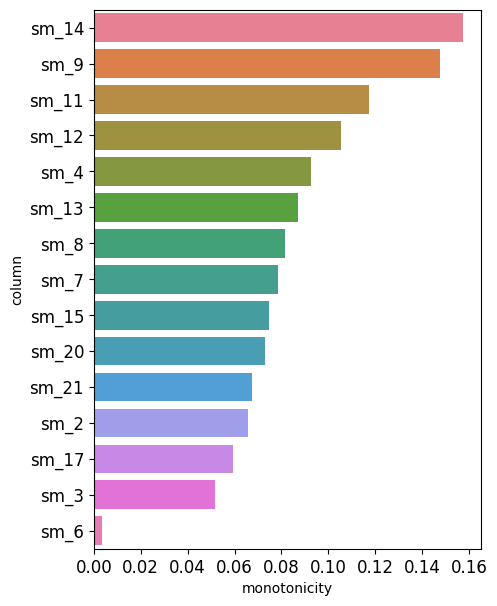

In [189]:
fig, ax = plt.subplots(figsize = (5,7))

sns.barplot(y = mon_df.column, x = mon_df.monotonicity,hue=mon_df.column)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

La faible monotonicité de la colonne `sm_6` suggère qu'elle pourrait être moins utile pour la modélisation prédictive et devrait être examinée ou éliminée .


### 2. Sélection des caractéristiques en utilisant la Tendabilité

Après avoir analysé la **monotonie** des caractéristiques, nous passons à la méthode de **tendabilité** (Trendability), qui évalue la capacité d'une caractéristique à suivre une tendance au fil du temps. Cette méthode repose sur la **corrélation** des caractéristiques avec le temps.

#### Formule de la Tendabilité :

\begin{equation*}
Trendability \ (x) =  \frac{1}{M} \sum_{j=1}^{M} \ |corr(x_j, t_j) |
\end{equation*}

où :
- x_j représente les valeurs de la caractéristique \( x \) au temps \( j \),
- t_j représente les valeurs temporelles,
- M est le nombre total d'observations.


Une forte tendabilité signifie qu'une caractéristique évolue de manière prévisible avec le temps, ce qui la rend plus pertinente pour la modélisation.




In [190]:
# Fonction de calcul de la tendabilité
def trendability(col):
    trend_vals = []
    
    for engine_id in data['engine'].unique():
        dff = data[data['engine'] == engine_id]
        trend_vals.append(dff[['time', col]].corr().iloc[0][1])
    
    return np.mean(np.abs(trend_vals))

In [ ]:
trend_df = []

# Calcul de la tendabilité pour chaque caractéristique
for col in columns:
    trendability_val = trendability(col)
    trend_df.append({'column': col, 'trendability': trendability_val})


In [192]:
# Conversion en DataFrame pandas
trend_df = pd.DataFrame(trend_df).sort_values(by='trendability', ascending=False)
trend_df


,column,trendability
7,sm_11,0.810601
8,sm_12,0.789662
2,sm_4,0.781614
4,sm_7,0.761514
11,sm_15,0.724844
14,sm_21,0.716710
13,sm_20,0.714120
9,sm_13,0.687316
5,sm_8,0.683526
10,sm_14,0.681272


<Axes: xlabel='trendability', ylabel='column'>

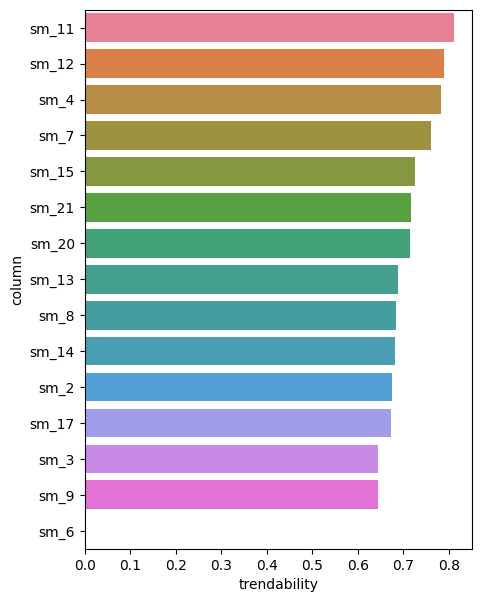

In [193]:

# Visualisation
fig, ax = plt.subplots(figsize=(5, 7))
sns.barplot(y=trend_df['column'], x=trend_df['trendability'],hue=trend_df['column'])


On peut éliminer `sm_6`  en raison de leur faible tendabilité (=0).


### 3. Sélection des caractéristiques en utilisant la Prognosabilité

La **prognosabilité** mesure la variance d'un prédicteur à la fin de la vie (End of Life, EoL) pour l'ensemble des unités. Formellement, la prognosabilité d'un prédicteur (caractéristique) est définie comme suit :

La **prognosabilité** est définie par la formule suivante :

\begin{equation*}

\text{Prognosabilité} = \exp \left( -\frac{\text{std}_j(x_j(N_j))}{\text{mean}_j |x_j(1) - x_j(N_j)|} \right)

\end{equation*}

Où :
-  M : nombre d'unités 
-  j : index de l'unité ( j = 1, .... M ),
-  N_j : nombre de mesures d'une caractéristique sur l'unité \( j \),
-  x_j : vecteur des mesures d'une caractéristique sur l'unité \( j \),
- mean_j : fonction moyenne de toutes les unités,
- std_j : fonction écart-type de toutes les unités.




La **prognosabilité** permet de mesurer dans quelle mesure une caractéristique peut prédire les événements ou défaillances futurs, notamment à la fin de vie de l'équipement. Les caractéristiques avec une forte prognosabilité sont considérées comme plus utiles pour prédire les défaillances à long terme et sont donc retenues lors de la sélection des caractéristiques.



In [194]:
# Fonction de calcul de la prognosabilité avec les 50 derniers cycles
def prognosability(col, num_cycles=50):
    diffs = []
    lastes_values = []

    # Parcours de chaque moteur unique
    for engine_id in data['engine'].unique():
        dff = data[data['engine'] == engine_id]  
        
        # Ne prendre que les 'num_cycles' derniers enregistrements pour chaque moteur
        dff = dff.tail(num_cycles)
        
        # Récupérer la première et la dernière valeur pour la colonne sélectionnée
        x_first = dff[col].iloc[0]
        x_last = dff[col].iloc[-1]
        
        # Calculer la différence et l'ajouter à la liste
        diff = np.abs(x_first - x_last)
        diffs.append(diff)
        lastes_values.append(x_last)

    # Calcul de la différence moyenne et de l'écart-type des dernières valeurs
    mean_diff = np.mean(diffs)

    # Convertir lastes_values en un tableau NumPy ou une série Pandas pour le calcul de l'écart-type
    lastes_values = np.array(lastes_values)
    std_last = np.std(lastes_values)  # Calcul de l'écart-type

    # Gestion du cas où l'écart-type est nul (caractéristique non sélectionnée)
    if std_last == 0:
        return 0  # Retourner 0 s'il n'y a pas de variance

    # Calcul de la prognosabilité pour cette caractéristique
    if mean_diff != 0:
        prognosability_val = np.exp(-std_last / mean_diff)
    else:
        prognosability_val = 0  # Pour éviter la division par zéro si mean_diff est 0

    return prognosability_val


In [195]:
prog_df = []

# Calcul de la prognosabilité pour chaque caractéristique
for col in columns:
    prognosability_val = prognosability(col)  # Utiliser la fonction de calcul de la prognosabilité
    prog_df.append({'column': col, 'prognosability': prognosability_val})  



In [196]:
# Créer un DataFrame pandas et trier par la valeur de la prognosabilité
prog_df = pd.DataFrame(prog_df).sort_values(by='prognosability', ascending=False)

# Afficher le DataFrame
prog_df

,column,prognosability
7,sm_11,0.801892
2,sm_4,0.801210
8,sm_12,0.777280
11,sm_15,0.760032
4,sm_7,0.756353
13,sm_20,0.750235
0,sm_2,0.717652
14,sm_21,0.713946
12,sm_17,0.683403
1,sm_3,0.650973


<Axes: xlabel='prognosability', ylabel='column'>

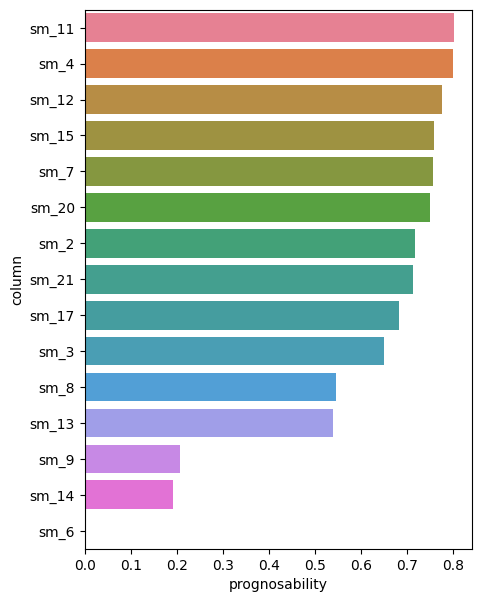

In [197]:

# Visualisation
fig, ax = plt.subplots(figsize=(5, 7))
sns.barplot(y=prog_df['column'], x=prog_df['prognosability'],hue=prog_df['column'])


Comme vous pouvez le constater dans les résultats, la colonne `sm_6` a obtenu un score de **prognosabilité** égal à 0. Cela signifie que La variance de ses dernières valeurs est nulle (aucune dispersion significative).

Cette colonne ne contribue pas à prédire le comportement futur des moteurs.( on peut l'éliminer)

#### Détection des colonnes fortement corrélées 

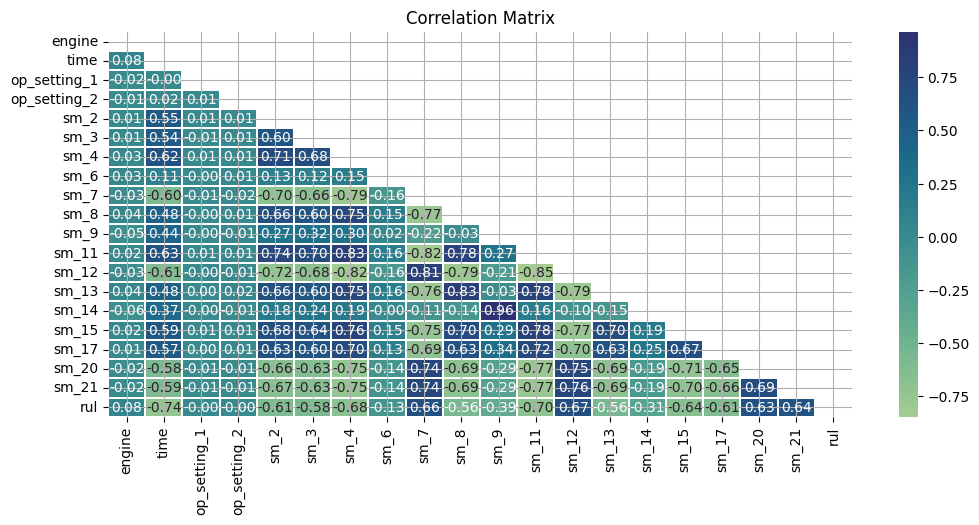

In [198]:
# Calcul de la matrice de corrélation
df_corr = data.corr()

# Création d'un masque pour la partie inférieure du triangle
mask = np.tril(np.ones(df_corr.shape), k=-1).astype(bool)
df_corr = df_corr.where(mask)

# Visualisation de la matrice de corrélation complète
plt.figure(figsize=(12, 5))
plt.grid()
plt.title('Correlation Matrix')
sns.heatmap(df_corr, annot=True, fmt='0.2f', cmap='crest', linewidths=0.01)
plt.show()

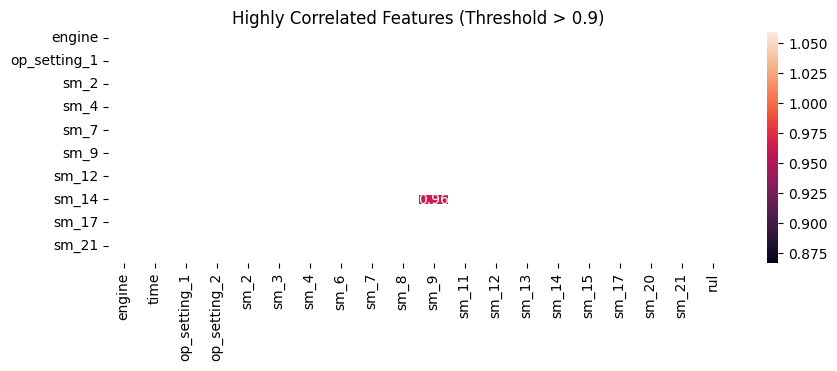

In [199]:
# Visualisation des corrélations élevées (seuil > 0.9)
plt.figure(figsize=(10, 3))
mask_high_corr = df_corr.where(abs(df_corr) > 0.9).isna()
sns.heatmap(df_corr, annot=True, fmt='0.2f', linewidths=0.1, mask=mask_high_corr)
plt.title('Highly Correlated Features (Threshold > 0.9)')
plt.show()

sm_9 et sm_14 sont fortement corrélées : Une seule de ces deux colonnes peut être conservée pour éviter la redondance.

#### Calcul du RUL (Remaining Useful Life)

Le RUL (Remaining Useful Life) représente le temps restant avant la fin de la durée de vie utile d'un moteur. Nous calculons cette métrique en soustrayant la valeur actuelle du temps de fonctionnement de chaque moteur à son temps de fonctionnement maximal.

In [202]:
def create_rul(df):
    df['rul'] = df.groupby('engine')['time'].transform('max') - df['time']
    return df
create_rul(data)

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [204]:
# Fonction pour visualiser un signal avec une moyenne glissante
def plot_signal(df, signal_name, Sensor_dictionary):
    figure = plt.figure(figsize=(10, 4))

    # Parcours de chaque moteur (engine)
    for engine in df['engine'].unique():
        if engine % 5 == 0:  # Affichage uniquement pour certains moteurs (par exemple, ceux multiples de 10)
            rolling_window = df[df['engine'] == engine].rolling(10).mean()
            sns.lineplot(data=rolling_window, x='rul', y=signal_name, label=f'Moteur {engine}')
    
    plt.tight_layout(), plt.xlim(250 , 0)
    plt.xlabel('Remainded Usefull Life (RUL)') , plt.ylabel(Sensor_dictionary[signal_name])
    plt.show()


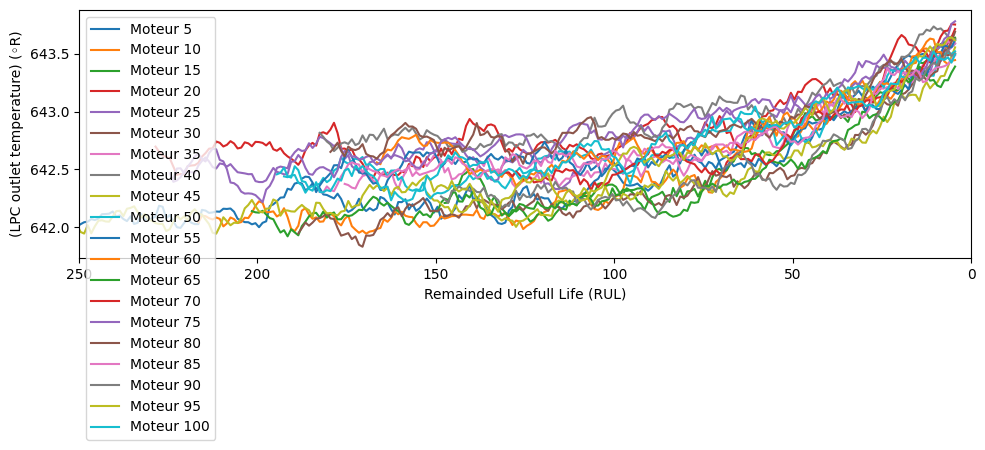

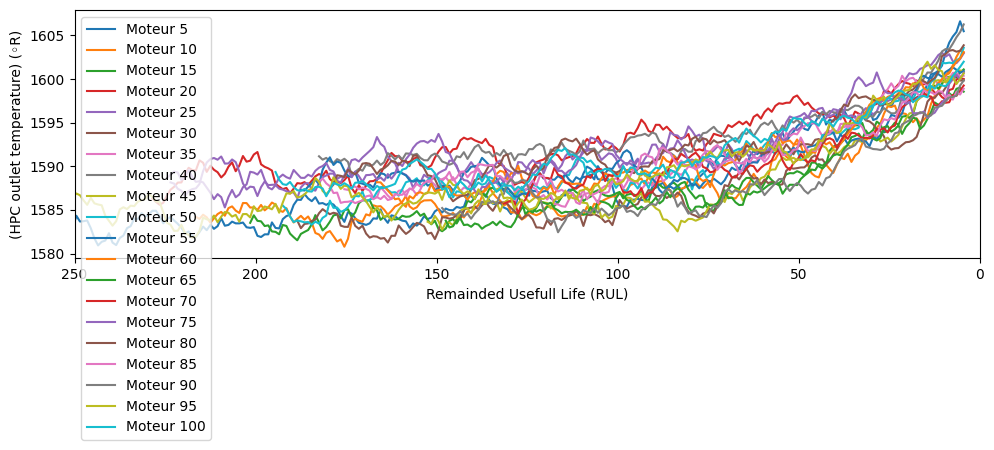

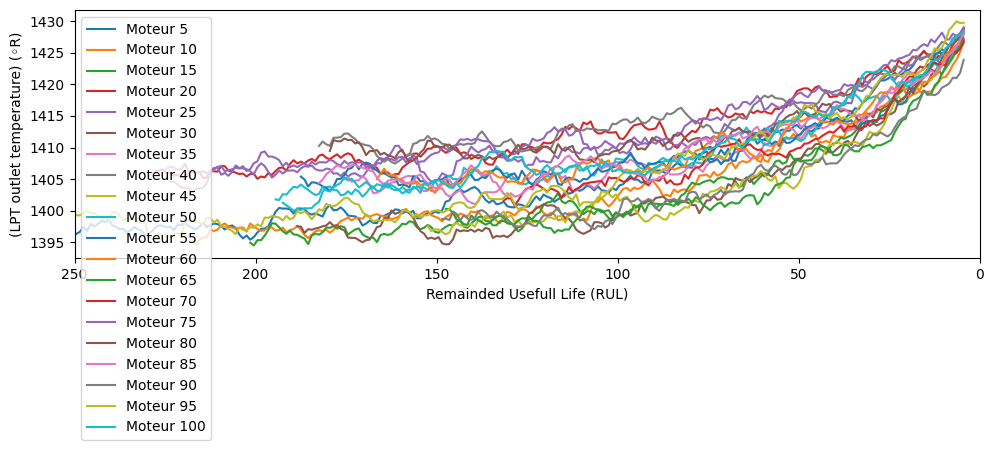

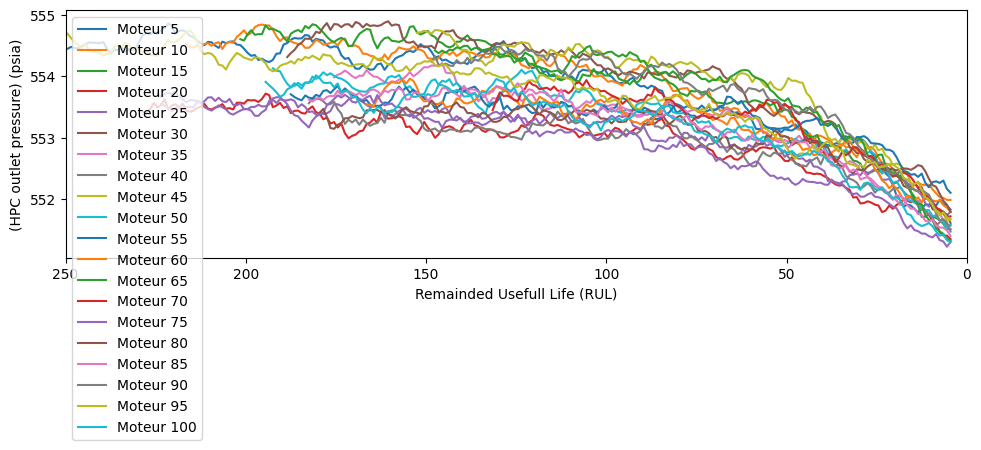

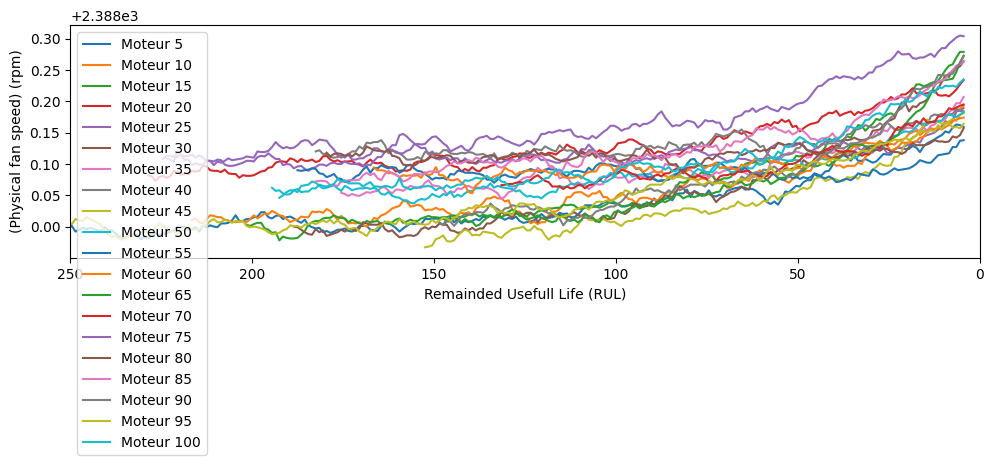

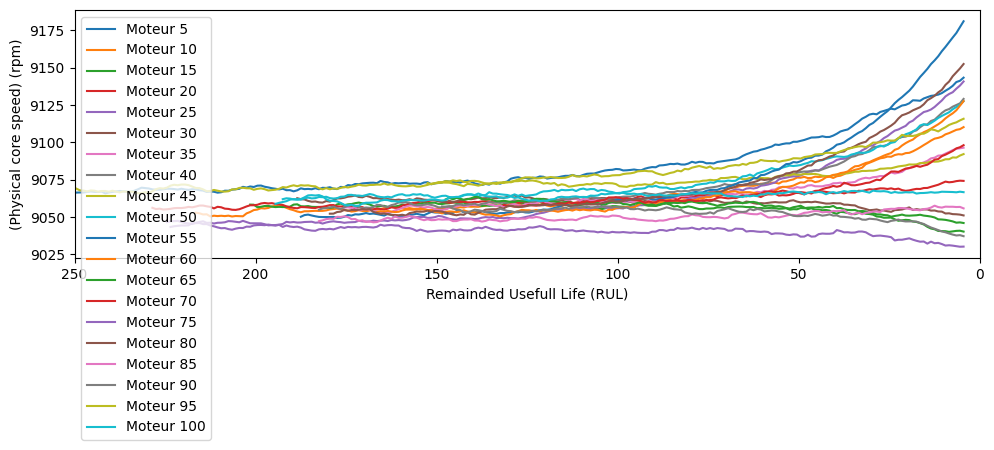

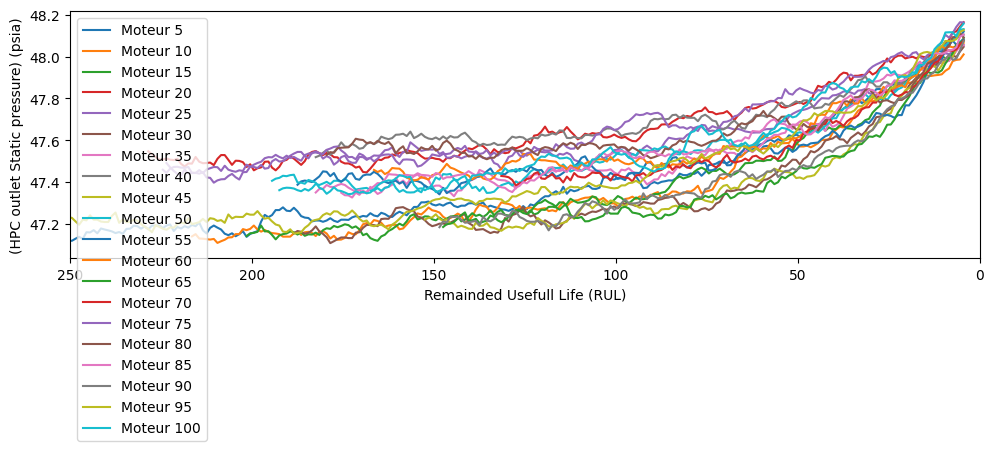

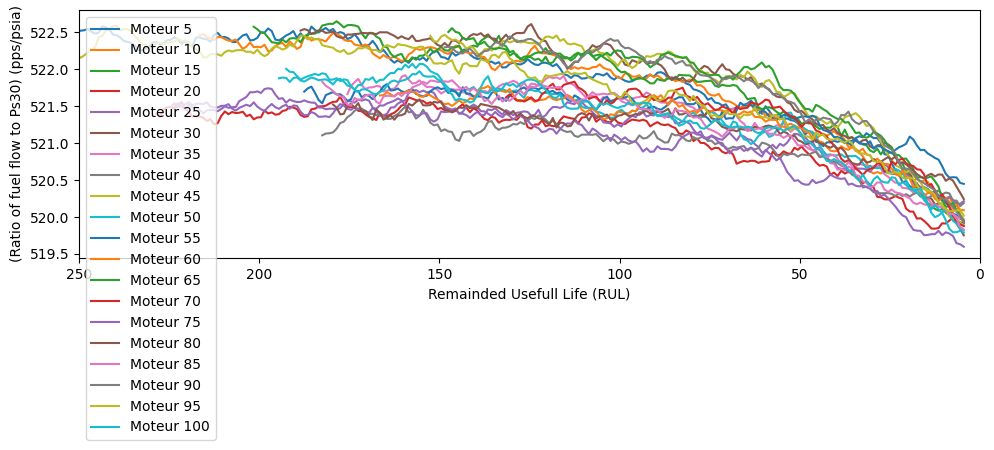

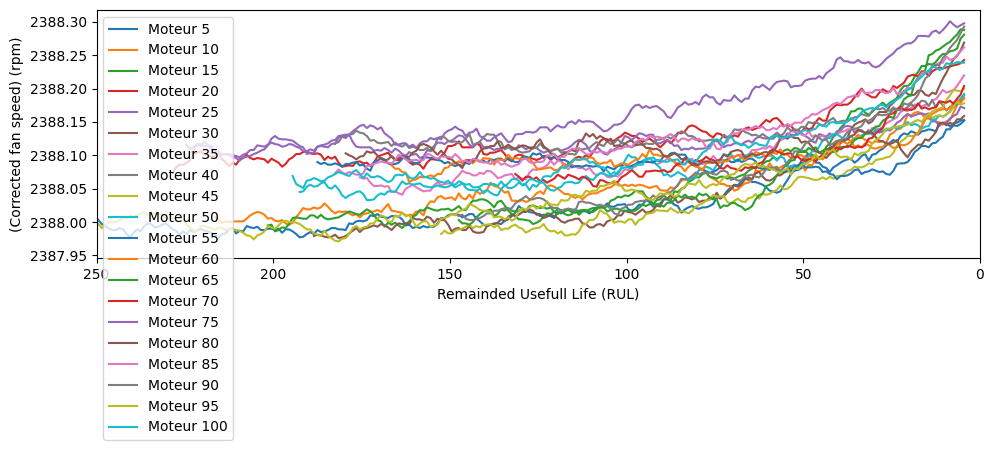

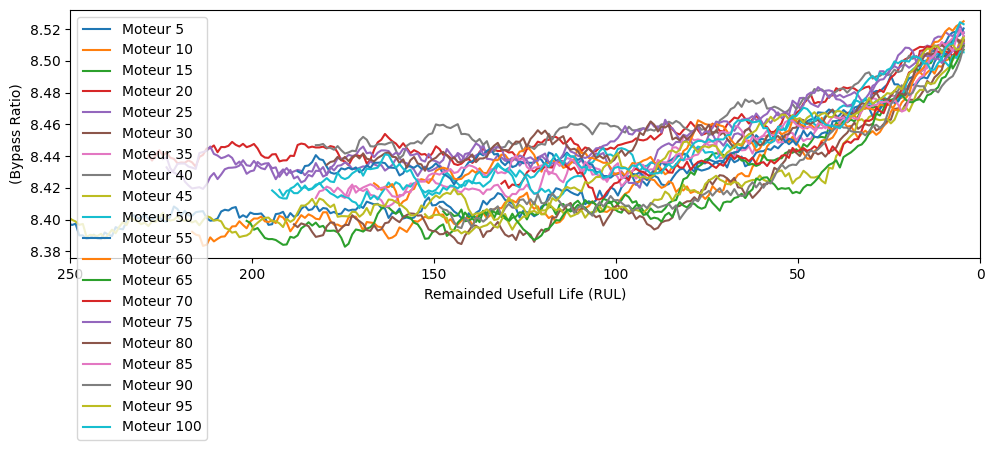

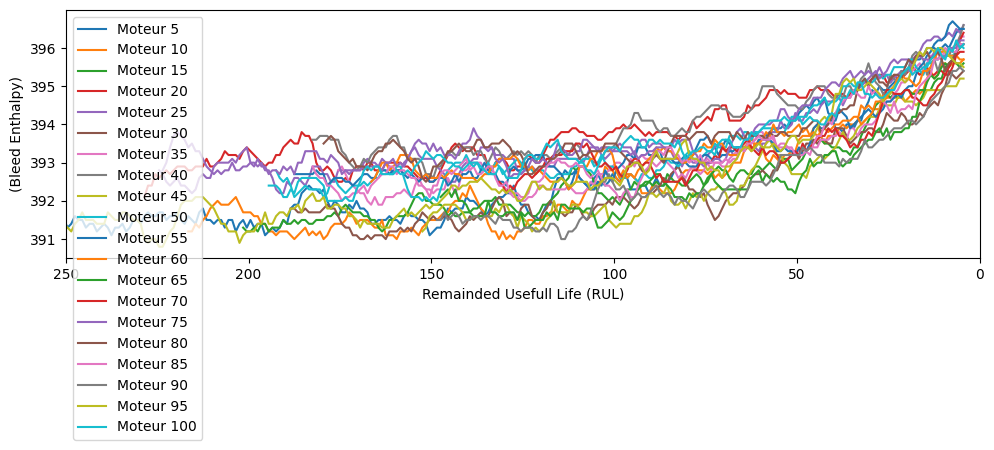

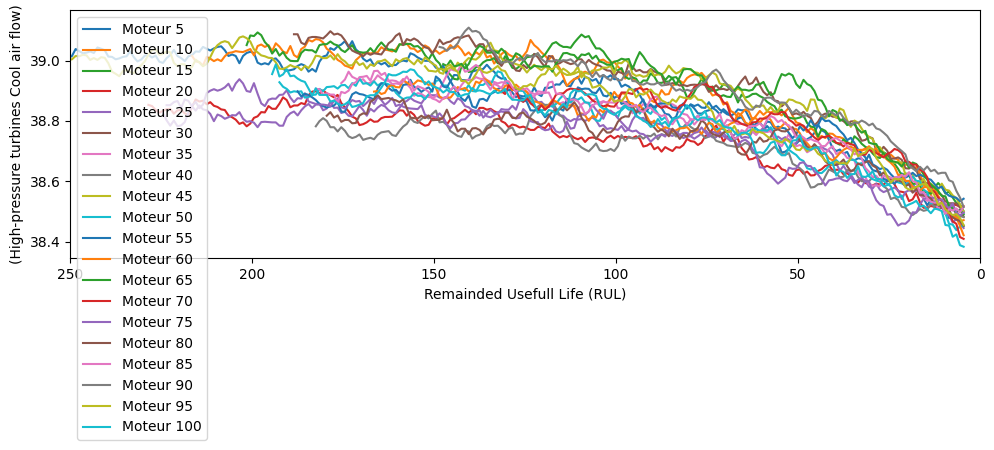

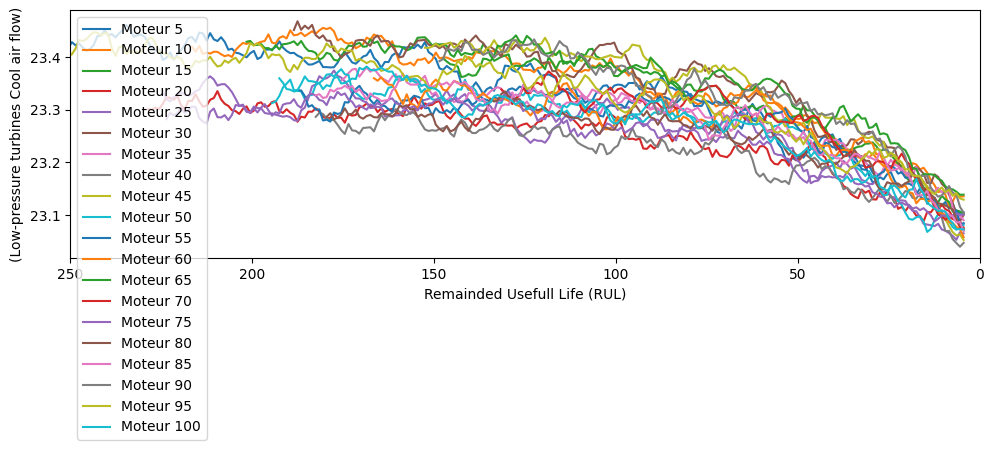

In [206]:
# visualiser les signals des capteurs sélectionées
sensors = [
     "sm_2", "sm_3", "sm_4", "sm_7", "sm_8","sm_9", "sm_11" 
    , "sm_12", "sm_13",  "sm_15", "sm_17", "sm_20", "sm_21"
]
for i in sensors:
    try:
        plot_signal(data , i  , Sensor_dictionary)
    except:
        pass

### Observations sur les signaux des moteurs et des capteurs :

Nous observons un signal fort dans les derniers cycles  avant la défaillance d'un moteur, ce qui peut être quantifié à l'aide de différentes techniques.

De plus, le capteur `sm_9 (Physical core speed) (rpm)`  semble avoir des valeurs différentes pour chaque moteur, ce qui pourrait ne pas être utile pour notre analyse. Cependant, ne le supprimons pas pour l'instant.






### Colonnes à Conserver :

D'après les méthodes appliquées (trendability, monotonocity, prognosability) et l'analyse des corrélations, voici les colonnes sélectionnées qui peuvent être considérées comme informatives :

Les colonnes suivantes ont été retenues car elles répondent aux critères de sélection avec des scores significatifs pour au moins une des métriques :
- `op_setting_1`
- `op_setting_2`
- `sm_2`
- `sm_3`
- `sm_4`
- `sm_7`
- `sm_8`
- `sm_9`
- `sm_11`
- `sm_12`
- `sm_13`
- `sm_15`
- `sm_17`
- `sm_20`
- `sm_21`

In [208]:
features  = ['op_setting_1', 'op_setting_2',"sm_2", "sm_3", "sm_4", "sm_7", "sm_8",
             "sm_9", "sm_11" , "sm_12", "sm_13",  "sm_15", "sm_17", "sm_20", "sm_21"
            ]